In [ ]:
"""make a model of UK Foundation Year medical school allocation based on previous data.
I first want to create a model that recreates the 73 % first-choice allocation, see how that changes when increasing London top choice by 10% 
Then try it with a random allocation and see how that changes"""

# Modelling UK Foundation Programme Placement


## 1. Preprocess the data

In [182]:
import pandas as pd
# path: data.csv
df = pd.read_csv('data.csv', header=0)
# show the first 5 entries
df.head()

,Medical school,Number applied,Number of applicants in FP allocation,Allocated to primary list,Number of FP applicants allocated to first preference,Percentage of FP applicants allocated to first preference,Number of FP applicants allocated to top 5 preference,Percentage of FP applicants allocated to top 5 preference,Number of FP applicants allocated lower than top 5 preference,Percentage of FP applicants allocated lower than top 5 preference,avg,std,max,min
0,Brighton and Sussex Medical School,124,109,103,71,68.93,96,93.20,7,6.80,80.610,5.869,95.256,64.918
1,Cardiff University,288,264,256,211,82.42,247,96.48,9,3.52,80.834,5.624,94.256,57.254
2,Hull and York Medical School,147,124,117,92,78.63,113,96.58,4,3.42,80.456,5.854,95.256,66.791
3,Imperial College London,311,272,265,181,68.30,238,89.81,27,10.19,82.078,5.649,94.225,63.164
4,Keele University,126,108,105,84,80.00,100,95.24,5,4.76,81.057,5.679,92.904,66.279


There are two entries without any information about the distribution of scores -- Non-UK medical schools and the UK Medical School, which denotes graduates of UK medical schools who applied through the eligibility office. We'll have to interpolate these values

In [5]:
df.sort_values(['Percentage of FP applicants allocated to first preference'], ascending=True).head()

,Medical school,Number applied,Number of applicants in FP allocation,Allocated to primary list,Number of FP applicants allocated to first preference,Percentage of FP applicants allocated to first preference,Number of FP applicants allocated to top 5 preference,Percentage of FP applicants allocated to top 5 preference,Number of FP applicants allocated lower than top 5 preference,Percentage of FP applicants allocated lower than top 5 preference,avg,std,max,min
8,Non-UK medical schools,628,524,390,175,44.87,308,78.97,82,21.03,NaN,NaN,NaN,NaN
20,University of Buckingham,75,73,66,34,51.52,57,86.36,9,13.64,77.591,5.376,87.167,63.636
16,UK Med School*,161,154,100,53,53.00,86,86.00,14,14.00,NaN,NaN,NaN,NaN
12,St George's University of London,294,260,242,141,58.26,207,85.54,35,14.46,80.370,6.377,95.778,63.247
5,King's College London,350,312,305,193,63.28,277,90.82,28,9.18,81.693,5.468,94.958,64.288


First, let's sort them by the schools which have the lowest percentage of applicants who get their first preference school -- we can assume there's some correlation between score distributions and this number, and we want the interpolation method to assume values near to other schools which had low first preference allocation stats.

In [6]:
df = df.sort_values(['Percentage of FP applicants allocated to first preference'], ascending=True).interpolate(method='linear', limit_direction="both", inplace=False)
df.head()

,Medical school,Number applied,Number of applicants in FP allocation,Allocated to primary list,Number of FP applicants allocated to first preference,Percentage of FP applicants allocated to first preference,Number of FP applicants allocated to top 5 preference,Percentage of FP applicants allocated to top 5 preference,Number of FP applicants allocated lower than top 5 preference,Percentage of FP applicants allocated lower than top 5 preference,avg,std,max,min
8,Non-UK medical schools,628,524,390,175,44.87,308,78.97,82,21.03,77.5910,5.3760,87.1670,63.6360
20,University of Buckingham,75,73,66,34,51.52,57,86.36,9,13.64,77.5910,5.3760,87.1670,63.6360
16,UK Med School*,161,154,100,53,53.00,86,86.00,14,14.00,78.9805,5.8765,91.4725,63.4415
12,St George's University of London,294,260,242,141,58.26,207,85.54,35,14.46,80.3700,6.3770,95.7780,63.2470
5,King's College London,350,312,305,193,63.28,277,90.82,28,9.18,81.6930,5.4680,94.9580,64.2880


We can see that these values have added for row 8 and row 16!

In [7]:
# unsort them just to be sure we don't mess anything up later on
df = df.reindex(index=range(0,len(df)))
df.head()

,Medical school,Number applied,Number of applicants in FP allocation,Allocated to primary list,Number of FP applicants allocated to first preference,Percentage of FP applicants allocated to first preference,Number of FP applicants allocated to top 5 preference,Percentage of FP applicants allocated to top 5 preference,Number of FP applicants allocated lower than top 5 preference,Percentage of FP applicants allocated lower than top 5 preference,avg,std,max,min
0,Brighton and Sussex Medical School,124,109,103,71,68.93,96,93.20,7,6.80,80.610,5.869,95.256,64.918
1,Cardiff University,288,264,256,211,82.42,247,96.48,9,3.52,80.834,5.624,94.256,57.254
2,Hull and York Medical School,147,124,117,92,78.63,113,96.58,4,3.42,80.456,5.854,95.256,66.791
3,Imperial College London,311,272,265,181,68.30,238,89.81,27,10.19,82.078,5.649,94.225,63.164
4,Keele University,126,108,105,84,80.00,100,95.24,5,4.76,81.057,5.679,92.904,66.279


## 2. Sample the Score Distribution
For each medical school, we sample the number of students from the distribution of scores, assuming that the real scores follow a bell curve

In [97]:
# based on the number of applicants in FP allocation and the ave, std, max, and min, generate dummy data from a normal distribution
import numpy as np

def generate_dummy_data(total_students, mean, std, max, min):
    dist = np.random.normal(mean, std, total_students)
    dist = np.clip(dist, min, max)
    return dist

# apply this to the dataframe to get dummy data
dummy = df.apply(lambda x: generate_dummy_data(x['Number of applicants in FP allocation'], x['avg'], x['std'], x['max'], x['min']), axis=1)
# each row of this dataframe represents a list of all the scores of students in that medical school
dummy.head()

0    [83.40696385924348, 76.70525710845111, 89.9061...
1    [80.10762986604746, 85.09743722096563, 84.7857...
2    [94.31891431598441, 73.7961655004386, 81.62308...
3    [91.38183052505173, 92.67480907278872, 94.0114...
4    [78.81975899099112, 71.90099008467047, 88.0459...
dtype: object

Let's look at how closely our sampled data matches an ideal normal curve. This is more for a sanity check than anything -- the real data probably doesn't _exactly_ follow a normal curve...

/Users/hope/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


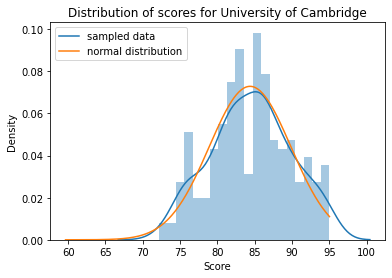

In [98]:
# let's plot the distribution overlaid as a histogram of sampled scores
import seaborn as sns
import matplotlib.pyplot as plt

i=22
sns.distplot(dummy[i], kde=True, bins=20)
from scipy.stats import norm
x = np.linspace(df['min'][i], df['max'][i], df.loc[i, 'Number of applicants in FP allocation'])
plt.plot(x, norm.pdf(x, df['avg'][i], df['std'][i]))
plt.title(f'Distribution of scores for {df.iloc[i]["Medical school"]}')
plt.xlabel('Score')
plt.legend(['sampled data', 'normal distribution'])
plt.show()

In [37]:
# let's turn this into a probability density function
x = np.linspace(df['min'][i], df['max'][i], df.loc[i, 'Number of applicants in FP allocation'])
np.mean(norm.pdf(dummy[i], np.mean(dummy[i]), np.std(dummy[i]))-norm.pdf(x, df.loc[i, 'avg'], df.loc[i, 'std']))

0.019252154686186556

We can also use a metric called the Jensen Shannon distance to measure the difference in probability distributions of the ideal and the generated scores. 

In [40]:
# we can also use the jensen-shannon distance to numerically compare the two distributions
from scipy.spatial.distance import jensenshannon
from tabulate import tabulate

table = [['Medical school', 'Jensen-Shannon distance']]
distances = []
for i in range(len(df)):
    # add these to a table
    x = np.linspace(df['min'][i], df['max'][i], df.loc[i, 'Number of applicants in FP allocation'])
    dist = jensenshannon(norm.pdf(dummy[i], np.mean(dummy[i]), np.std(dummy[i])), norm.pdf(x, df.loc[i, 'avg'], df.loc[i, 'std']))
    distances.append(dist)
    table.append([df.iloc[i]['Medical school'], dist])

Medical school                           Jensen-Shannon distance
-------------------------------------  -------------------------
Brighton and Sussex Medical School                      0.309922
Cardiff University                                      0.403601
Hull and York Medical School                            0.302391
Imperial College London                                 0.344533
Keele University                                        0.286567
King's College London                                   0.34313
Newcastle University                                    0.332188
Norwich Medical School                                  0.368623
Non-UK medical schools                                  0.275791
Plymouth University Peninsula Schools                   0.282691
Queen Mary University of London                         0.329136
Queen's University Belfast                              0.359043
St George's University of London                        0.308938
The University of Edinburg

We need to reshape the data so that each score is on its own line, not in a list of scores

In [41]:
# dummy has a list of estimated scores per student at that medical school
scores = []
for i, row in enumerate(dummy):
    for score in row:
        scores.append({"med_school": i, "score": score})
scores = pd.DataFrame(scores)

# keep the index as the student id
scores.index.name = "student_id"
scores.head()

,med_school,score
student_id,,
0,0,77.050875
1,0,74.392495
2,0,75.736417
3,0,72.774457
4,0,79.674836


In [42]:
# sort the df by score 
sorted_scores = scores.sort_values(by='score', ascending=False, inplace=False)
sorted_scores.head()

,med_school,score
student_id,,
3716,17,96.035000
3864,17,96.035000
3920,17,96.035000
3829,17,96.033921
2904,12,95.778000


### Visualizing

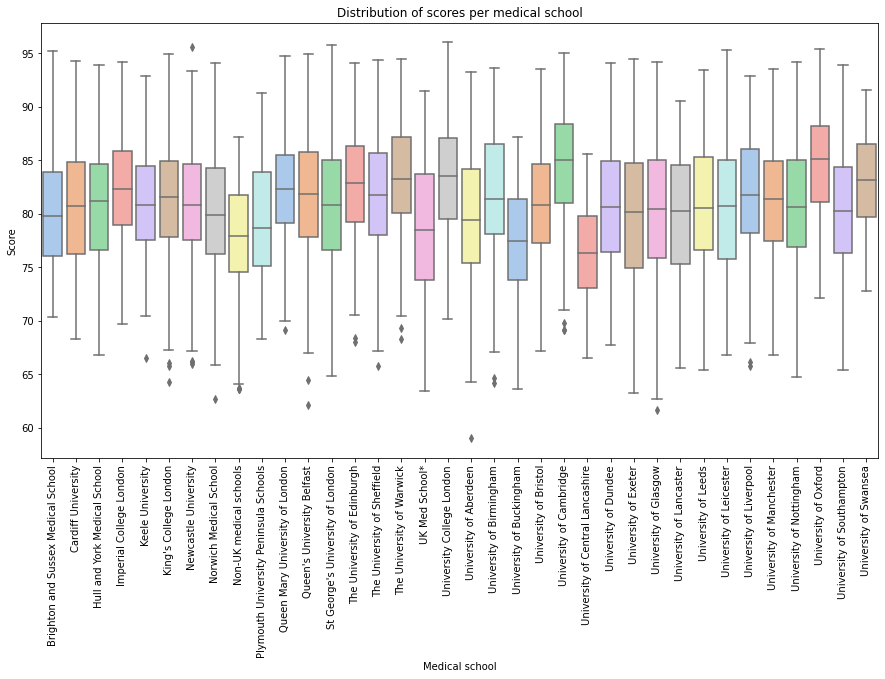

In [99]:
sns.boxplot(x='med_school', y='score', data=sorted_scores, palette='pastel')
plt.xticks(rotation=90)
# make it a larger image
plt.gcf().set_size_inches(15, 8)
plt.title("Distribution of scores per medical school")
plt.xlabel("Medical school")
plt.ylabel("Score")
plt.xticks(np.arange(len(df["Medical school"])), df["Medical school"])
plt.show()

We'll use the same cutoff of primary list allocation and reserve as the original data...

In [45]:
print(df['Number of applicants in FP allocation'].sum())
print(df['Allocated to primary list'].sum())

7338
6844


In [110]:
primary = sorted_scores.iloc[:6844]
reserve = sorted_scores.iloc[6844:]
primary.head()

,med_school,score
student_id,,
3716,17,96.035000
3864,17,96.035000
3920,17,96.035000
3829,17,96.033921
2904,12,95.778000


For another sanity check, let's plot how many students per medical school ended up on the primary list based on their simulated score compared to the actual counts released by UKFP. The error bars show percentage difference to the real data.


We're pretty close! The largest percentage differences are for the two schools for which we had to interpolate values -- Non-UK Medical Schools and the umbrella UK Medical school. This tells me we could do a better job interpolating, but I reckon it's close enough

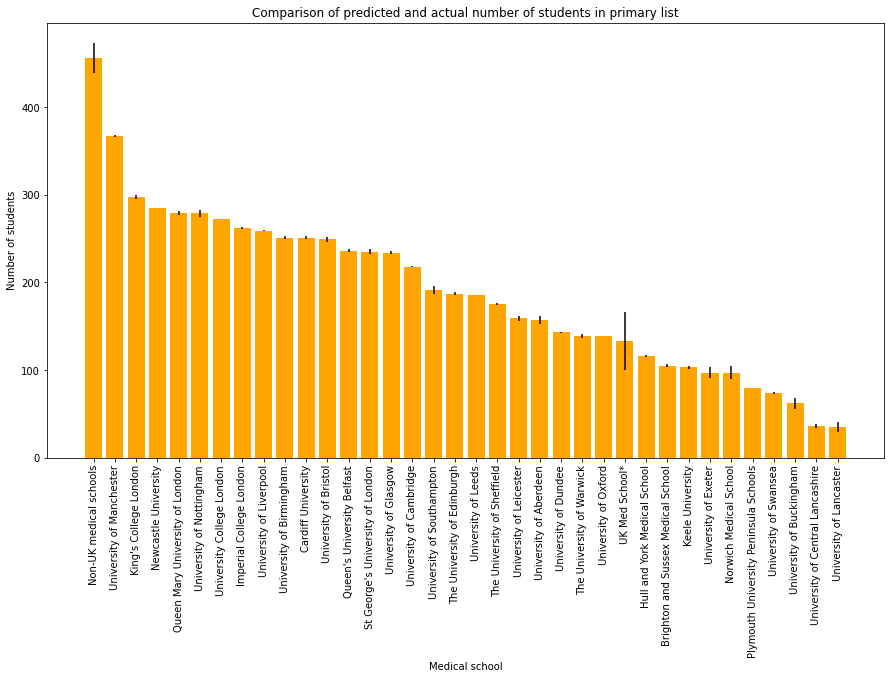

In [48]:
tmp = primary.groupby('med_school').count()
tmp['gt'] = df['Allocated to primary list']
tmp['diff'] = np.abs((tmp['score'] - tmp['gt']) / tmp['gt'])*100
tmp = tmp.sort_values(by='score', ascending=False)
# plot using diff as error bars
plt.bar(np.arange(len(tmp)), tmp['score'], yerr=tmp['diff'], color='orange')
plt.xticks(np.arange(len(df["Medical school"])), df["Medical school"].reindex(tmp.index), rotation=90)
plt.title("Comparison of predicted and actual number of students in primary list")
plt.xlabel('Medical school')
# thick bars
plt.gcf().set_size_inches(15, 8)
plt.ylabel("Number of students")
plt.show()

# 3. Simulate choices
For this, we need two more pieces of information; the quotas for each deanery, and the number of applications to each deanery

In [199]:
deaneries = pd.read_csv('preferences.csv', header=0)
# prefs.columns = [col.strip() for col in prefs.columns]
deaneries.head()

,deanery,places,num_first_pref
0,East Anglia,251,121
1,"Essex, Bedfordshire & Hertfordshire (EBH)",260,148
2,"Leicestershire, Northamptonshire & Rutland (LNR)",158,87
3,North Central and East London/North West London,562,1409
4,North West of England,786,810


In [200]:
deaneries

,deanery,places,num_first_pref
0,East Anglia,251,121
1,"Essex, Bedfordshire & Hertfordshire (EBH)",260,148
2,"Leicestershire, Northamptonshire & Rutland (LNR)",158,87
3,North Central and East London/North West London,562,1409
4,North West of England,786,810
5,Northern,329,293
6,Northern Ireland,236,185
7,Oxford,215,310
8,Peninsula,184,175
9,Scotland,812,805


### Which deaneries are the most popular?

In [201]:
# here we need to make the weights for each of the 19 deaneries.
deaneries['weights'] = deaneries['num_first_pref']/deaneries['num_first_pref'].sum()
deaneries.sort_values(by=['weights'], ascending=False, inplace=False).head()

,deanery,places,num_first_pref,weights
3,North Central and East London/North West London,562,1409,0.206326
4,North West of England,786,810,0.118612
9,Scotland,812,805,0.117880
11,South Thames,742,679,0.099429
18,Yorkshire and Humber,550,431,0.063113


No surprise -- London! It accounts for 20% of first preferences, followed by the North West of England and then Scotland, which each account for about 1/8th of the students. And this may actually underestimate real student preferences...

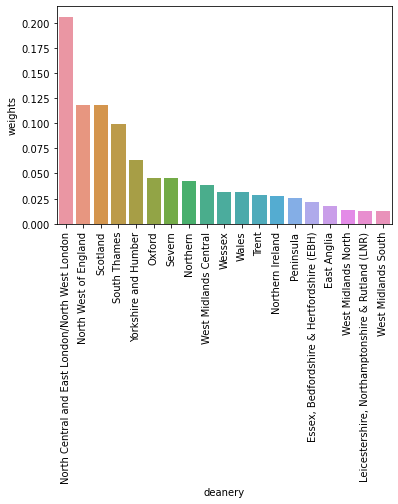

In [202]:
sns.barplot(data=deaneries.sort_values(['weights'], ascending=False), x='deanery', y='weights')
plt.xticks(rotation=90)
plt.show()

### Generate probable choices for the primary list
Based on the weights of the deaneries in the real data, we can influence a random number generator to choose the order of preferences for each student.

In [203]:
# Function to generate ordered choices and return as a Series
def generate_ordered_choices(row, weights=deaneries['weights']):
    ordered_choices = np.random.choice(deaneries['deanery'], len(deaneries), replace=False, p=weights)
    return pd.Series(ordered_choices, index=[f"pref_{i+1}" for i in range(len(deaneries))])


primary = primary.apply(lambda row: generate_ordered_choices(row), axis=1)
primary.head(10)


,pref_1,pref_2,pref_3,pref_4,pref_5,pref_6,pref_7,pref_8,pref_9,pref_10,pref_11,pref_12,pref_13,pref_14,pref_15,pref_16,pref_17,pref_18,pref_19
student_id,,,,,,,,,,,,,,,,,,,
3716,Scotland,Trent,North Central and East London/North West London,South Thames,East Anglia,North West of England,Northern,Oxford,West Midlands North,Severn,Wales,"Essex, Bedfordshire & Hertfordshire (EBH)",Yorkshire and Humber,Peninsula,Northern Ireland,Wessex,West Midlands Central,"Leicestershire, Northamptonshire & Rutland (LNR)",West Midlands South
3864,Scotland,North Central and East London/North West London,Yorkshire and Humber,Severn,South Thames,Trent,East Anglia,West Midlands Central,Northern,"Essex, Bedfordshire & Hertfordshire (EBH)",Peninsula,Oxford,North West of England,Wessex,"Leicestershire, Northamptonshire & Rutland (LNR)",West Midlands South,Northern Ireland,Wales,West Midlands North
3920,North Central and East London/North West London,"Essex, Bedfordshire & Hertfordshire (EBH)",Yorkshire and Humber,Oxford,Severn,South Thames,Scotland,Northern,Trent,North West of England,Northern Ireland,West Midlands Central,Wessex,Wales,Peninsula,West Midlands North,"Leicestershire, Northamptonshire & Rutland (LNR)",East Anglia,West Midlands South
3829,North Central and East London/North West London,West Midlands Central,Oxford,East Anglia,South Thames,Yorkshire and Humber,West Midlands North,Scotland,North West of England,Severn,Trent,Northern,Wessex,Peninsula,Wales,Northern Ireland,"Essex, Bedfordshire & Hertfordshire (EBH)",West Midlands South,"Leicestershire, Northamptonshire & Rutland (LNR)"
2904,Northern Ireland,Scotland,North Central and East London/North West London,North West of England,East Anglia,Yorkshire and Humber,Severn,Wessex,West Midlands Central,Wales,West Midlands North,"Leicestershire, Northamptonshire & Rutland (LNR)",Oxford,Trent,Peninsula,West Midlands South,South Thames,Northern,"Essex, Bedfordshire & Hertfordshire (EBH)"
1376,North West of England,Wessex,Northern,"Essex, Bedfordshire & Hertfordshire (EBH)",Northern Ireland,South Thames,North Central and East London/North West London,Yorkshire and Humber,Scotland,East Anglia,"Leicestershire, Northamptonshire & Rutland (LNR)",Wales,Severn,Trent,West Midlands Central,Peninsula,Oxford,West Midlands North,West Midlands South
6921,North Central and East London/North West London,North West of England,Scotland,South Thames,Oxford,Severn,"Leicestershire, Northamptonshire & Rutland (LNR)",Northern Ireland,Yorkshire and Humber,Peninsula,Wessex,Trent,West Midlands North,East Anglia,West Midlands South,Northern,Wales,"Essex, Bedfordshire & Hertfordshire (EBH)",West Midlands Central
7014,Peninsula,Severn,North West of England,North Central and East London/North West London,Northern,Scotland,South Thames,Oxford,West Midlands Central,Wales,West Midlands South,Yorkshire and Humber,"Leicestershire, Northamptonshire & Rutland (LNR)",Wessex,"Essex, Bedfordshire & Hertfordshire (EBH)",Northern Ireland,West Midlands North,Trent,East Anglia
3773,Scotland,South Thames,Wessex,"Essex, Bedfordshire & Hertfordshire (EBH)",North Central and East London/North West London,West Midlands South,West Midlands Central,Oxford,Peninsula,Severn,Yorkshire and Humber,Wales,Northern,"Leicestershire, Northamptonshire & Rutland (LNR)",North West of England,West Midlands North,Trent,Northern Ireland,East Anglia


We can quickly sanity check and see that our distribution is very close. We could make a plot like the bar plot above if we wanted

In [185]:
deaneries[['deanery', 'num_first_pref']].sort_values('num_first_pref', ascending=False).head()

,deanery,num_first_pref
3,North Central and East London/North West London,1409
4,North West of England,810
9,Scotland,805
11,South Thames,679
18,Yorkshire and Humber,431


In [186]:
primary['pref_1'].value_counts().head()

North Central and East London/North West London    1422
North West of England                               803
Scotland                                            775
South Thames                                        670
Yorkshire and Humber                                440
Name: pref_1, dtype: int64

# 4. Simulate the allocation process

We have two different methods to try:

1. `allocate_by_student`: in this method, we allocate one student at a time, and only requires one full pass through the dataset. If the student's first preference is available, allocate them there. If not, work down their preferences until the first one that is not full, and allocate them there. 
2. `allocate_by_wave`: in this method, we work through the entire dataset in multiple waves (at most, `len(deaneries)` waves). Allocate all students to first preference unless the deanery is full; if it is, pass this student and continue allocating to first preference. Then, pass through all the students again, now considering second preference. Continue until all students are allocated. This method is much slower, as it requires multiple passes through the dataset

In [187]:
# let's make some columns to keep track of how many students are allocated to each deanery. 
# We'll keep track of the number of students allocated in the deaneries dataframe, 
# and where they are allocated in the primary dataframe
deaneries['count'] = 0
primary['allocated'] = None

deaneries.head()

,deanery,places,num_first_pref,count
0,East Anglia,251,121,0
1,"Essex, Bedfordshire & Hertfordshire (EBH)",260,148,0
2,"Leicestershire, Northamptonshire & Rutland (LNR)",158,87,0
3,North Central and East London/North West London,562,1409,0
4,North West of England,786,810,0


In [193]:
def allocate_by_student(students, deaneries):
    """try to allocate a student to their first choice; if full, work down the preference list until finding the first available open place, then allocate"""
    for i, row in students.iterrows():
        for k in range(len(deaneries)):
            pref = row[f'pref_{k+1}']
            if deaneries.loc[deaneries['deanery'] == pref, 'places'].values[0] > deaneries.loc[deaneries['deanery'] == pref, 'count'].values[0]:
                deaneries.loc[deaneries['deanery'] == pref, 'count'] += 1
                students.loc[i, 'allocated'] = pref
                break
        if students.loc[i, 'allocated'] is None:
            # this should never be reached, but is a sanity check
            print(f'student {i} could not be allocated')
    return students, deaneries

def allocate_by_wave(students, deaneries):
    """a function to allocate a list of students to their first preference deanery if possible"""
    for k in range(len(deaneries)):
        for i, row in students.iterrows():
            if students.loc[i, 'allocated'] is None:
                pref = row[f'pref_{k+1}']
                if deaneries.loc[deaneries['deanery'] == pref, 'places'].values[0] > deaneries.loc[deaneries['deanery'] == pref, 'count'].values[0]:
                    deaneries.loc[deaneries['deanery'] == pref, 'count'] += 1
                    students.loc[i, 'allocated'] = pref
                else:
                    continue
        if students['allocated'].isnull().sum() == 0:
            print(f'all students allocated, stopping at {k+1}th preference')
            break

    return students, deaneries

def allocate_in_two_passes(students, deaneries):
    """a mixture of the two. In a first pass of all students, allocate as many as possible to first choice. In a second pass, allocate each remaining student to whichever choice of theirs isn't full yet"""
    # first pass
    for i, row in students.iterrows():
        pref = row[f'pref_{1}']
        if deaneries.loc[deaneries['deanery'] == pref, 'places'].values[0] > deaneries.loc[deaneries['deanery'] == pref, 'count'].values[0]:
            deaneries.loc[deaneries['deanery'] == pref, 'count'] += 1
            students.loc[i, 'allocated'] = pref
        else:
            continue
    # second pass
    for i, row in students.iterrows():
        if students.loc[i, 'allocated'] is None:
            for k in range(1, len(deaneries)):
                pref = row[f'pref_{k+1}']
                if deaneries.loc[deaneries['deanery'] == pref, 'places'].values[0] > deaneries.loc[deaneries['deanery'] == pref, 'count'].values[0]:
                    deaneries.loc[deaneries['deanery'] == pref, 'count'] += 1
                    students.loc[i, 'allocated'] = pref
                    break
                else:
                    continue
    return students, deaneries

In [118]:
# this should take 10-20 seconds to run
alloc_students, alloc_deaneries = allocate_by_student(primary, deaneries)


In [119]:
# we have exactly the right number of students, so places and count should now be equal
alloc_deaneries[['deanery', 'places', 'count']]

,deanery,places,count
0,East Anglia,251,251
1,"Essex, Bedfordshire & Hertfordshire (EBH)",260,260
2,"Leicestershire, Northamptonshire & Rutland (LNR)",158,158
3,North Central and East London/North West London,562,562
4,North West of England,786,786
5,Northern,329,329
6,Northern Ireland,236,236
7,Oxford,215,215
8,Peninsula,184,184
9,Scotland,812,812


### Let's see how we did:
from UKFP documentation: "A total of 6,844 (93%) applicants were allocated to the primary list, 94% of whom were allocated to one of their top five foundation schools. In line with previous years, 75% of applicants allocated to the primary list were allocated to their first preference, with 83% of applicants being placed at one of their top two foundation schools"

In [60]:
alloc_students[['pref_1', 'pref_2', 'allocated']].head()

,pref_1,pref_2,allocated
student_id,,,
3716,Yorkshire and Humber,Scotland,Yorkshire and Humber
3864,North West of England,Wessex,North West of England
3920,South Thames,Scotland,South Thames
3829,North Central and East London/North West London,Northern Ireland,North Central and East London/North West London
2904,South Thames,North Central and East London/North West London,South Thames


In [120]:
# let's find the percentage of students who got their first choice
alloc_students['top choice'] = alloc_students['allocated'] == alloc_students['pref_1']

# use a lambda function. If allocated in pref_1,...pref_5, then True
for i, row in alloc_students.iterrows():
    alloc_students.loc[i, 'top 2'] = row['allocated'] in [row[f'pref_{j}'] for j in range(1, 3)]
    alloc_students.loc[i, 'top 5'] = row['allocated'] in [row[f'pref_{j}'] for j in range(1, 6)]

alloc_students[['pref_1', 'pref_2','allocated', 'top choice','top 2','top 5']].head()

,pref_1,pref_2,allocated,top choice,top 2,top 5
student_id,,,,,,
3716,Yorkshire and Humber,North Central and East London/North West London,Yorkshire and Humber,True,True,True
3864,North Central and East London/North West London,Scotland,North Central and East London/North West London,True,True,True
3920,Oxford,West Midlands Central,Oxford,True,True,True
3829,Northern,Scotland,Northern,True,True,True
2904,Scotland,Peninsula,Scotland,True,True,True


In [121]:
# get the percetange of students who got their top choice
top = alloc_students['top choice'].sum() / len(alloc_students)
top_2 = alloc_students['top 2'].sum() / len(alloc_students)
# get the percetange of students who got one of their top 5 choices
top_5 = alloc_students['top 5'].sum() / len(alloc_students)
print(f"Percentage of students who got their top choice: {top*100:.2f}%")
print(f"Percentage of students who got one of their top 2 choices: {top_2*100:.2f}%")
print(f"Percentage of students who got one of their top 5 choices: {top_5*100:.2f}%")

Percentage of students who got their top choice: 76.36%
Percentage of students who got one of their top 2 choices: 89.61%
Percentage of students who got one of their top 5 choices: 96.16%


In [125]:
# get count of those who didn't get top 5
print(f'{len(alloc_students) - alloc_students["top 5"].sum()} students didn\'t get one of their top 5 choices')

263 students didn't get one of their top 5 choices


In [132]:
alloc_students.groupby('pref_1').count()['top choice']

pref_1
East Anglia                                          115
Essex, Bedfordshire & Hertfordshire (EBH)            169
Leicestershire, Northamptonshire & Rutland (LNR)      82
North Central and East London/North West London     1423
North West of England                                782
Northern                                             310
Northern Ireland                                     171
Oxford                                               292
Peninsula                                            180
Scotland                                             832
Severn                                               287
South Thames                                         657
Trent                                                187
Wales                                                226
Wessex                                               227
West Midlands Central                                289
West Midlands North                                  109
West Midlands South     

In [88]:
! pip install typing -qqq

# 5. Bringing it all together
### Testing Allocation Method
let's combine all these steps into one function to run it many times for a baseline

In [190]:
from typing import Callable

def run_baseline(data_path, deaneries_path, method: Callable, weights: list=None, random: bool=False):
    # 1. read in the data and preprocess
    df = pd.read_csv(data_path, header=0)
    df = df.sort_values(['Percentage of FP applicants allocated to first preference'], ascending=True).interpolate(method='linear', limit_direction="both", inplace=False)
    df = df.reindex(index=range(0,len(df)))
    
    # 2. generate dummy data
    dummy = df.apply(lambda x: generate_dummy_data(x['Number of applicants in FP allocation'], x['avg'], x['std'], x['max'], x['min']), axis=1)
    scores = []
    
    # 3. reshape the dummy data into a dataframe
    for i, row in enumerate(dummy):
        for score in row:
            scores.append({"med_school": i, "score": score})
    scores = pd.DataFrame(scores)
    scores.index.name = "student_id"
    
    # 4. sort by score and split into primary and reserve
    if random:
        # randomly shuffle the scores
        sorted_scores = scores.sample(frac=1)
    else:
        # sort by score
        sorted_scores = scores.sort_values(by='score', ascending=False, inplace=False)
    primary = sorted_scores.iloc[:df['Allocated to primary list'].sum()]
    
    # 5. read in the deaneries data and preprocess
    deaneries = pd.read_csv(deaneries_path, header=0)
    deaneries['weights'] = deaneries['num_first_pref']/deaneries['num_first_pref'].sum()
    
    # 6. generate ordered choices for each student
    if weights is None:
        weights = deaneries['weights']
    primary = primary.apply(lambda row: generate_ordered_choices(row, weights), axis=1)
    
    # 7. add columns for counts and allocations
    deaneries['count'] = 0
    primary['allocated'] = None
    
    # 8. allocate students to deaneries
    alloc_students, alloc_deaneries = method(primary, deaneries)
    
    # 9. get metrics
    alloc_students['top choice'] = alloc_students['allocated'] == alloc_students['pref_1']
    for i, row in alloc_students.iterrows():
        alloc_students.loc[i, 'top 2'] = row['allocated'] in [row[f'pref_{j}'] for j in range(1, 3)]
        alloc_students.loc[i, 'top 5'] = row['allocated'] in [row[f'pref_{j}'] for j in range(1, 6)]
    top = alloc_students['top choice'].sum() / len(alloc_students)
    top_2 = alloc_students['top 2'].sum() / len(alloc_students)
    top_5 = alloc_students['top 5'].sum() / len(alloc_students)
    
    return alloc_students, [top, top_2, top_5]

    

In [ ]:
# I also want to see
# of the people allocated to each deanery, for how many was it their first choice or in their top 5 choices?
alloc_students.groupby('allocated').sum().sort_values('top 5', ascending=False).head()

In [194]:
results = [['top choice (%)', 'top 2 (%)', 'top 5 (%)']]
for _ in range(5):
    _, [top, top_2, top_5] = run_baseline('data.csv', 'preferences.csv', allocate_in_two_passes)
    results.append([np.round(top*100, 2), np.round(top_2*100, 2), np.round(top_5*100, 2)])
table = tabulate(results, headers='firstrow', tablefmt='fancy_grid')
print(table)

╒══════════════════╤═════════════╤═════════════╕
│   top choice (%) │   top 2 (%) │   top 5 (%) │
╞══════════════════╪═════════════╪═════════════╡
│            84.34 │          89 │          95 │
├──────────────────┼─────────────┼─────────────┤
│            82.76 │          88 │          95 │
├──────────────────┼─────────────┼─────────────┤
│            83.28 │          88 │          95 │
├──────────────────┼─────────────┼─────────────┤
│            84.37 │          89 │          95 │
├──────────────────┼─────────────┼─────────────┤
│            83.65 │          88 │          95 │
╘══════════════════╧═════════════╧═════════════╛


In [205]:
results = [['top choice (%)', 'top 2 (%)', 'top 5 (%)']]
for _ in range(5):
    _, [top, top_2, top_5] = run_baseline('data.csv', 'preferences.csv', allocate_in_two_passes, random=True)
    results.append([np.round(top*100, 2), np.round(top_2*100, 2), np.round(top_5*100, 2)])
table = tabulate(results, headers='firstrow', tablefmt='fancy_grid')
print(table)

╒══════════════════╤═════════════╤═════════════╕
│   top choice (%) │   top 2 (%) │   top 5 (%) │
╞══════════════════╪═════════════╪═════════════╡
│            83.64 │       88.25 │       94.81 │
├──────────────────┼─────────────┼─────────────┤
│            82.29 │       88.11 │       95.03 │
├──────────────────┼─────────────┼─────────────┤
│            84.72 │       88.18 │       94.86 │
├──────────────────┼─────────────┼─────────────┤
│            83.34 │       88.72 │       96.16 │
├──────────────────┼─────────────┼─────────────┤
│            84.34 │       89.28 │       95.81 │
╘══════════════════╧═════════════╧═════════════╛


In [66]:
results = [['top choice (%)', 'top 2 (%)', 'top 5 (%)']]
for _ in range(5):
    _, [top, top_2, top_5] = run_baseline('data.csv', 'preferences.csv', allocate_by_wave)
    results.append([np.round(top*100, 2), np.round(top_2*100), np.round(top_5*100)])
table = tabulate(results, headers='firstrow', tablefmt='fancy_grid')
print(table)

all students allocated, stopping at 18th preference
Percentage of students who got their top choice: 83.59%
Percentage of students who got one of their top 2 choices: 90.41%
Percentage of students who got one of their top 5 choices: 95.82%

all students allocated, stopping at 18th preference
Percentage of students who got their top choice: 83.88%
Percentage of students who got one of their top 2 choices: 90.49%
Percentage of students who got one of their top 5 choices: 96.05%

all students allocated, stopping at 18th preference
Percentage of students who got their top choice: 83.71%
Percentage of students who got one of their top 2 choices: 90.18%
Percentage of students who got one of their top 5 choices: 96.14%

all students allocated, stopping at 18th preference
Percentage of students who got their top choice: 82.93%
Percentage of students who got one of their top 2 choices: 90.40%
Percentage of students who got one of their top 5 choices: 96.62%

all students allocated, stopping at 

In [197]:
results = [['top choice (%)', 'top 2 (%)', 'top 5 (%)']]
for _ in range(5):
    _,[top, top_2, top_5] = run_baseline('data.csv', 'preferences.csv', allocate_by_student)
    results.append([np.round(top*100, 2), np.round(top_2*100), np.round(top_5*100)])
table = tabulate(results, headers='firstrow', tablefmt='fancy_grid')
print(table)

╒══════════════════╤═════════════╤═════════════╕
│   top choice (%) │   top 2 (%) │   top 5 (%) │
╞══════════════════╪═════════════╪═════════════╡
│            74.68 │          88 │          95 │
├──────────────────┼─────────────┼─────────────┤
│            76.33 │          89 │          96 │
├──────────────────┼─────────────┼─────────────┤
│            76.96 │          89 │          96 │
├──────────────────┼─────────────┼─────────────┤
│            76.5  │          90 │          96 │
├──────────────────┼─────────────┼─────────────┤
│            76.05 │          89 │          96 │
╘══════════════════╧═════════════╧═════════════╛


# 6. Perturbations
### What if 10% more people put London down as their first preference?

In [174]:
def get_weights(deaneries, k=0.1):
    tmp = deaneries.copy()
    ldn_weight = tmp.loc[tmp['deanery'] == 'North Central and East London/North West London', 'weights'].values[0]
    inc = ldn_weight * k

    for i, row in tmp.iterrows():
        if row['deanery'] == 'North Central and East London/North West London':
            tmp.loc[i, 'weights'] += inc
        else:
            tmp.loc[i, 'weights'] -= inc/(len(tmp)-1)
    return tmp['weights']

Adjusting the other probabilities to account for the fact that London is 10% more popular

In [169]:
weights = get_weights(deaneries, k=0.1)
# check that the weights sum to 1 (it's a probability distribution)
weights.sum()

1.0

In [170]:
_, [top, top_2, top_5] = run_baseline('data.csv', 'preferences.csv', 
                                                    allocate_by_student, weights=get_weights(deaneries, k=0.1))

print("Allocation by student with 10% increase in London top choice:")
print(f"Percentage of students who got their top choice: {top*100:.2f}%")
print(f"Percentage of students who got one of their top 2 choices: {top_2*100:.2f}%")
print(f"Percentage of students who got one of their top 5 choices: {top_5*100:.2f}%")


Allocation by student with 10% increase in London top choice:
Percentage of students who got their top choice: 73.50%
Percentage of students who got one of their top 2 choices: 88.50%
Percentage of students who got one of their top 5 choices: 94.89%


In [171]:
_, [top, top_2, top_5] = run_baseline('data.csv', 'preferences.csv', 
                                                    allocate_by_student, weights=get_weights(deaneries, k=0.2))

print("Allocation by student with 20% increase in London top choice:")
print(f"Percentage of students who got their top choice: {top*100:.2f}%")
print(f"Percentage of students who got one of their top 2 choices: {top_2*100:.2f}%")
print(f"Percentage of students who got one of their top 5 choices: {top_5*100:.2f}%")

Allocation by student with 20% increase in London top choice:
Percentage of students who got their top choice: 70.73%
Percentage of students who got one of their top 2 choices: 86.57%
Percentage of students who got one of their top 5 choices: 94.48%


In [172]:
_, [top, top_2, top_5] = run_baseline('data.csv', 'preferences.csv', 
                                                    allocate_by_wave, weights=get_weights(deaneries, k=0.1))

print("Allocation by wave with 10% increase in London top choice:")
print(f"Percentage of students who got their top choice: {top*100:.2f}%")
print(f"Percentage of students who got one of their top 2 choices: {top_2*100:.2f}%")
print(f"Percentage of students who got one of their top 5 choices: {top_5*100:.2f}%")

all students allocated, stopping at 18th preference
Allocation by wave with 10% increase in London top choice:
Percentage of students who got their top choice: 82.39%
Percentage of students who got one of their top 2 choices: 90.75%
Percentage of students who got one of their top 5 choices: 95.85%


In [173]:
_, [top, top_2, top_5] = run_baseline('data.csv', 'preferences.csv', 
                                                    allocate_by_wave, weights=get_weights(deaneries, k=0.2))

print("Allocation by student with 20% increase in London top choice:")
print(f"Percentage of students who got their top choice: {top*100:.2f}%")
print(f"Percentage of students who got one of their top 2 choices: {top_2*100:.2f}%")
print(f"Percentage of students who got one of their top 5 choices: {top_5*100:.2f}%")

all students allocated, stopping at 18th preference
Allocation by student with 20% increase in London top choice:
Percentage of students who got their top choice: 80.65%
Percentage of students who got one of their top 2 choices: 88.79%
Percentage of students who got one of their top 5 choices: 94.64%


In [204]:
_, [top, top_2, top_5] = run_baseline('data.csv', 'preferences.csv', 
                                                    allocate_in_two_passes, weights=get_weights(deaneries, k=0.2))

print("Allocation by student with 20% increase in London top choice:")
print(f"Percentage of students who got their top choice: {top*100:.2f}%")
print(f"Percentage of students who got one of their top 2 choices: {top_2*100:.2f}%")
print(f"Percentage of students who got one of their top 5 choices: {top_5*100:.2f}%")

Allocation by student with 20% increase in London top choice:
Percentage of students who got their top choice: 80.70%
Percentage of students who got one of their top 2 choices: 86.37%
Percentage of students who got one of their top 5 choices: 94.05%


### What happens with random allocation?

In [176]:
_, [top, top_2, top_5] = run_baseline('data.csv', 'preferences.csv', allocate_by_student, random=False)
print('Score-based allocation by student')
print(f'Percentage of students who got their top choice: {top*100:.2f}%')
print(f'Percentage of students who got one of their top 2 choices: {top_2*100:.2f}%')
print(f'Percentage of students who got one of their top 5 choices: {top_5*100:.2f}%')


Score-based allocation by student
Percentage of students who got their top choice: 75.47%
Percentage of students who got one of their top 2 choices: 88.81%
Percentage of students who got one of their top 5 choices: 95.69%


In [177]:
_, [top, top_2, top_5] = run_baseline('data.csv', 'preferences.csv', allocate_by_wave, random=False)
print('Score-based allocation by wave')
print(f'Percentage of students who got their top choice: {top*100:.2f}%')
print(f'Percentage of students who got one of their top 2 choices: {top_2*100:.2f}%')
print(f'Percentage of students who got one of their top 5 choices: {top_5*100:.2f}%')


all students allocated, stopping at 18th preference
Score-based allocation by wave
Percentage of students who got their top choice: 83.53%
Percentage of students who got one of their top 2 choices: 90.52%
Percentage of students who got one of their top 5 choices: 96.33%


In [ ]:
_, [top, top_2, top_5] = run_baseline('data.csv', 'preferences.csv', allocate_in_two_passes, random=True)
print('Score-based allocation by wave')
print(f'Percentage of students who got their top choice: {top*100:.2f}%')
print(f'Percentage of students who got one of their top 2 choices: {top_2*100:.2f}%')
print(f'Percentage of students who got one of their top 5 choices: {top_5*100:.2f}%')


In [165]:
_, [top, top_2, top_5] = run_baseline('data.csv', 'preferences.csv', allocate_by_student, random=True)
print('Random allocation')
print(f'Percentage of students who got their top choice: {top*100:.2f}%')
print(f'Percentage of students who got one of their top 2 choices: {top_2*100:.2f}%')
print(f'Percentage of students who got one of their top 5 choices: {top_5*100:.2f}%')


Random allocation
Percentage of students who got their top choice: 75.50%
Percentage of students who got one of their top 2 choices: 89.10%
Percentage of students who got one of their top 5 choices: 95.98%


In [178]:
_, [top, top_2, top_5] = run_baseline('data.csv', 'preferences.csv', allocate_by_student, weights=get_weights(deaneries, 0.1), random=True)
print('Random allocation with London increased by 10%')
print(f'Percentage of students who got their top choice: {top*100:.2f}%')
print(f'Percentage of students who got one of their top 2 choices: {top_2*100:.2f}%')
print(f'Percentage of students who got one of their top 5 choices: {top_5*100:.2f}%')

Random allocation with London increased by 10%
Percentage of students who got their top choice: 72.56%
Percentage of students who got one of their top 2 choices: 87.08%
Percentage of students who got one of their top 5 choices: 94.71%


In [179]:
_, [top, top_2, top_5] = run_baseline('data.csv', 'preferences.csv', allocate_by_student, weights=get_weights(deaneries, 0.2), random=True)
print('Random allocation with London increased by 20%')
print(f'Percentage of students who got their top choice: {top*100:.2f}%')
print(f'Percentage of students who got one of their top 2 choices: {top_2*100:.2f}%')
print(f'Percentage of students who got one of their top 5 choices: {top_5*100:.2f}%')

Random allocation with London increased by 20%
Percentage of students who got their top choice: 71.35%
Percentage of students who got one of their top 2 choices: 86.85%
Percentage of students who got one of their top 5 choices: 94.59%
